25


<IPython.core.display.Javascript object>


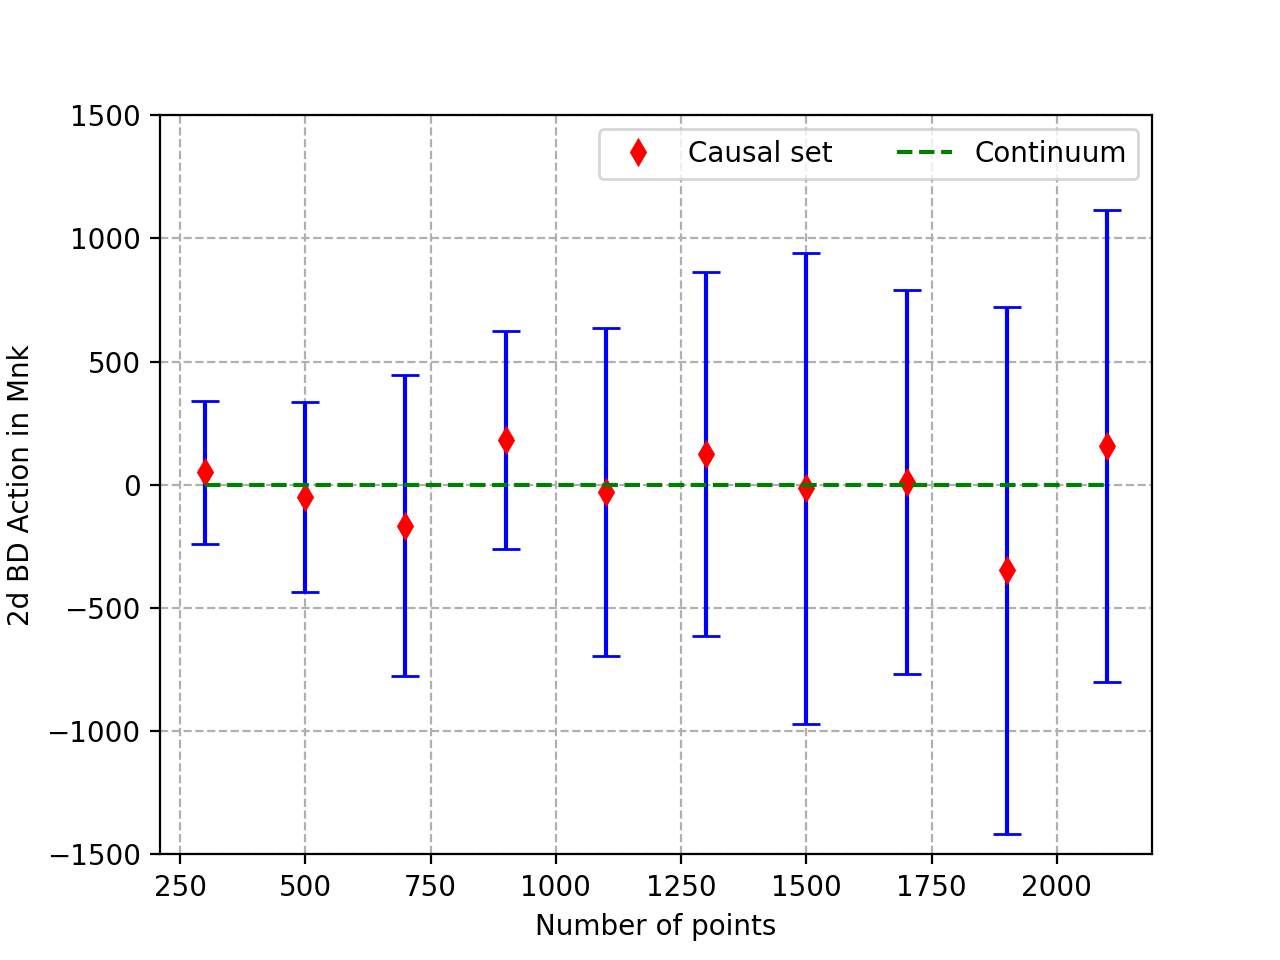

In [11]:
#Two Dimensional calculation of Benincasa-Dowker Action 

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math

A=int(input()) #Number of times the code can be iterated 
a4=[]
q=range(300,2200,200) #Range of number of elements

for j in range(1,A+1):
    a2=[]
    t1=-1
    t2=0
    
    #Obatin points that lie inside the Alexendrov interval(Diamond shape) for each number of points(N) 
    for N in q:
        x2=(t2-t1)/2
        x1=-x2
        L=[]        #**
        count=0
        while count<N:
            R1 = np.random.uniform(0,1)
            R2 = np.random.uniform(0,1)
            lx=R2*(x2-x1)+x1
            lt= R1*(t2-t1)+t1
            if (np.square((lt)-(t1))>np.square(lx) and np.square((lt)-(t2))>np.square(lx)):
                count+=1
                tuple=[lx,lt]
                L.append(tuple)
        
        x=[0,0]
        y=[0,-1]
        L.append(x)
        L.append(y)
        
        #The L list is ordered according to increasing time
        def takeSecond(elem):
            return elem[1]    
        L.sort(key=takeSecond) 
        
        #Obtain Relations matrix (R)
        R=[]
        for j in range(len(L)):
            R.append([])
            for i in range(len(L)):
                if (np.square(L[i][1]-L[j][1])>= np.square(L[i][0]-L[j][0]) and L[i][1]> L[j][1]):
                    R[j].append(1) 
                else:
                    R[j].append(0)
        I=np.identity(len(R))
        R1=np.dot(I,R)          
        R2=np.dot(R,R)
        
        #Obtain Link matrix (Li)
        Li=[]
        for j in range(len(R)):
            Li.append([])
            for i in range(len(R)):
                if (R[j][i]==1 and R2[j][i]==0):
                    Li[j].append(1)
                else:
                    Li[j].append(0)
        L1=np.dot(I,Li)
        
        #Using Li and R, we obtain Exp1......Exp3 which are the number of elements that belong to each layer
        
        Exp1=0
        for i in range(len(L1)):
            for j in range(len(L1)): 
                if (R[i][j]==1 and L1[i][j]==1 ):
                    Exp1+=1
       
        Exp2=0
        for i in range(len(L1)):
            for j in range(len(L1)): 
                if (R[i][j]==1 and R2[i][j]==1):
                    Exp2+=1
        Exp3=0
        for i in range(len(L1)):
            for j in range(len(L1)): 
                if (R[i][j]==1 and R2[i][j]==2):
                    Exp3+=1

                    
        #Calculate action according to BD action
        Act=(2)*(N-2*Exp1+4*Exp2-2*Exp3)
        a2.append(Act)
    a4.append(a2)

#Calculating standard deviation (G) for each value of Action(Act) of corresponding (N)   
G=[]
j0=[]
for i in range(len(a4)):  
        j0.append(a4[i][0])
g0=np.std(j0,axis=0)
G.append(g0)

j1=[]
for i in range(len(a4)):  
        j1.append(a4[i][1])
g1=np.std(j1,axis=0)
G.append(g1)

j2=[]
for i in range(len(a4)):  
        j2.append(a4[i][2])
g2=np.std(j2,axis=0)
G.append(g2)

j3=[]
for i in range(len(a4)):  
        j3.append(a4[i][3])
g3=np.std(j3,axis=0)
G.append(g3)

j4=[]
for i in range(len(a4)):  
        j4.append(a4[i][4])
g4=np.std(j4,axis=0)
G.append(g4)

j5=[]
for i in range(len(a4)):  
        j5.append(a4[i][5])
g5=np.std(j5,axis=0)
G.append(g5)

j6=[]
for i in range(len(a4)):  
        j6.append(a4[i][6])
g6=np.std(j6,axis=0)
G.append(g6)

j7=[]
for i in range(len(a4)):  
        j7.append(a4[i][7])
g7=np.std(j7,axis=0)
G.append(g7)

j8=[]
for i in range(len(a4)):  
        j8.append(a4[i][8])
g8=np.std(j8,axis=0)
G.append(g8)

j9=[]
for i in range(len(a4)):  
        j9.append(a4[i][9])
g9=np.std(j9,axis=0)
G.append(g9)


#Plot the action by averaging value over 25 different causal sets along with error bars
k=np.sum(a4,0)/A
plt.plot(q,k,'o',color='red',marker='d')
plt.errorbar(q, k, yerr=G, fmt='o', markersize=0, capsize=5, ecolor='blue');  

#Plot the continuum Action
a=[q[0],q[len(q)-1]]
b=[0,0]
plt.plot(a, b, color='green', linestyle="--")

plt.legend(["Causal set ","Continuum"], ncol = 2 , loc = "upper right")
plt.ylim(bottom=-1500, top=1500)
plt.grid(True, linestyle='--')
plt.xlabel('Number of points')
plt.ylabel('2d BD Action in Mnk')
plt.savefig('2d Action MN.pdf')

    
            
        
        
